In [1]:
import utils
import metrics
import PCA
import SVM
import matplotlib.pyplot as plt
import numpy as np




Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
priors = [0.5]
D, L = utils.load('Train.txt')
ZD, mean, standardDeviation = utils.ZNormalization(D)
C=np.logspace(-3, 3, num=15)
gamma = [10**(-5),10**(-4),10**(-3)]
model = SVM.SVM()
PCA7 = PCA.PCA(ZD, L, 7)
PCA6 = PCA.PCA(ZD, L, 6)
print ("Executing RBF SVM with no re-balancing")

Executing RBF SVM with no re-balancing


In [72]:
# SINGLE FOLD Z NORMALIZED SVM RBF
(DTRSF, LTRSF), (DEVSF, LEVSF) = utils.split_db_singleFold(ZD, L)
minDCF = []
print("Start RBF SVM on single fold of z normalized features")
for i in range(len(priors)):
    print("")
    print("Working on application with prior:", priors[i])
    for g in gamma:
        print("")
        print("Working with gamma:", g) 
        for value in C:
            model.train(DTRSF, LTRSF, option='RBF',C=value, gamma=g) 
            temp = metrics.minimum_detection_costs(model.predictAndGetScores(DEVSF), LEVSF, priors[i], 1, 1)
            minDCF.append(temp)
            print("For C=", value, "the minDCF is", temp)
print("")
print("END")

Start RBF SVM on single fold of z normalized features

Working on application with prior: 0.5

Working with gamma: 1e-05
For C= 0.001 the minDCF is 0.26013220591766834
For C= 0.0026826957952797246 the minDCF is 0.24925112804762448
For C= 0.0071968567300115215 the minDCF is 0.2322337238842756
For C= 0.019306977288832496 the minDCF is 0.1564365070337087
For C= 0.0517947467923121 the minDCF is 0.15314905395669814
For C= 0.13894954943731375 the minDCF is 0.19701462354175356
For C= 0.3727593720314938 the minDCF is 0.1587077693095211
For C= 1.0 the minDCF is 0.17074154122271515
For C= 2.6826957952797246 the minDCF is 0.15508158596544447
For C= 7.196856730011514 the minDCF is 0.18660625134291384
For C= 19.306977288832496 the minDCF is 0.14542145375952678
For C= 51.794746792312125 the minDCF is 0.22304882518737598
For C= 138.9495494373136 the minDCF is 0.14694700388023105
For C= 372.7593720314938 the minDCF is 0.1680974228693487
For C= 1000.0 the minDCF is 0.15830331525929298

Working with gam

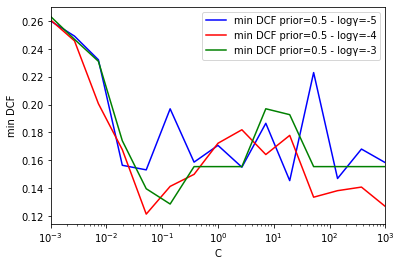

In [87]:
utils.plotDCFRBF(C, minDCF, "C")

In [74]:
# SINGLE FOLD Z NORMALIZED RBF SVM WITH PCA = 7
(DTRSF, LTRSF), (DEVSF, LEVSF) = utils.split_db_singleFold(PCA7, L)
minDCF7 = []
print("Start RBF SVM on single fold of z normalized features with PCA = 7")
for i in range(len(priors)):
    print("")
    print("Working on application with prior:", priors[i])
    for g in gamma:
        print("")
        print("Working with gamma:", g) 
        for value in C:
            model.train(DTRSF, LTRSF, option='RBF',C=value, gamma=g) 
            temp = metrics.minimum_detection_costs(model.predictAndGetScores(DEVSF), LEVSF, priors[i], 1, 1)
            minDCF7.append(temp)
            print("For C=", value, "the minDCF is", temp)
print("")
print("END")

Start RBF SVM on single fold of z normalized features with PCA = 7

Working on application with prior: 0.5

Working with gamma: 1e-05
For C= 0.001 the minDCF is 0.25860665579696407
For C= 0.0026826957952797246 the minDCF is 0.2329453102288957
For C= 0.0071968567300115215 the minDCF is 0.19941986122170402
For C= 0.019306977288832496 the minDCF is 0.16853853056787876
For C= 0.0517947467923121 the minDCF is 0.16775869260228263
For C= 0.13894954943731375 the minDCF is 0.1502685827677296
For C= 0.3727593720314938 the minDCF is 0.15847141647391905
For C= 1.0 the minDCF is 0.14881128426800136
For C= 2.6826957952797246 the minDCF is 0.19806494015343978
For C= 7.196856730011514 the minDCF is 0.1379643322084455
For C= 19.306977288832496 the minDCF is 0.1975555808339337
For C= 51.794746792312125 the minDCF is 0.21260632717804828
For C= 138.9495494373136 the minDCF is 0.14674224901730304
For C= 372.7593720314938 the minDCF is 0.24091179109948307
For C= 1000.0 the minDCF is 0.15982633754218328

Wor

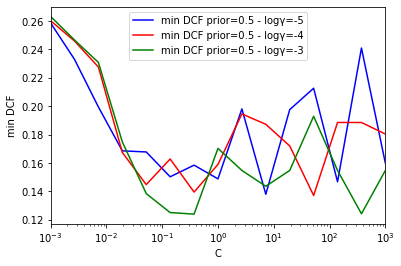

In [88]:
utils.plotDCFRBF(C, minDCF7, "C")

In [78]:
# SINGLE FOLD Z NORMALIZED RBF SVM WITH PCA = 6
(DTRSF, LTRSF), (DEVSF, LEVSF) = utils.split_db_singleFold(PCA6, L)
minDCF6 = []
print("Start linear RBF on single fold of z normalized features with PCA = 6")
for i in range(len(priors)):
    print("")
    print("Working on application with prior:", priors[i])
    for g in gamma:
        print("")
        print("Working with gamma:", g) 
        for value in C:
            model.train(DTRSF, LTRSF, option='RBF',C=value, gamma=g) 
            temp = metrics.minimum_detection_costs(model.predictAndGetScores(DEVSF), LEVSF, priors[i], 1, 1)
            minDCF6.append(temp)
            print("For C=", value, "the minDCF is", temp)
print("")
print("END")

Start linear RBF on single fold of z normalized features with PCA = 6

Working on application with prior: 0.5

Working with gamma: 1e-05
For C= 0.001 the minDCF is 0.25935236795207217
For C= 0.0026826957952797246 the minDCF is 0.2365398956002983
For C= 0.0071968567300115215 the minDCF is 0.2329794360393837
For C= 0.019306977288832496 the minDCF is 0.1617588695509296
For C= 0.0517947467923121 the minDCF is 0.14399828107028653
For C= 0.13894954943731375 the minDCF is 0.16104728320630948
For C= 0.3727593720314938 the minDCF is 0.18131801463618094
For C= 1.0 the minDCF is 0.13867591855306563
For C= 2.6826957952797246 the minDCF is 0.17077566703320315
For C= 7.196856730011514 the minDCF is 0.19192861386013474
For C= 19.306977288832496 the minDCF is 0.19606415652371745
For C= 51.794746792312125 the minDCF is 0.15650475865468472
For C= 138.9495494373136 the minDCF is 0.13945322868084783
For C= 372.7593720314938 the minDCF is 0.1807745295061869
For C= 1000.0 the minDCF is 0.16660599855913244



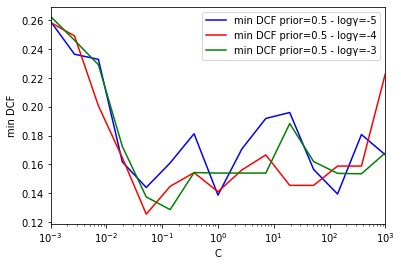

In [89]:
utils.plotDCFRBF(C, minDCF6, "C")

In [81]:
minDCF3fold = []
print("Start RBF SVM with 3-fold on z normalized features")
for i in range(len(priors)):
    print("")
    print("Working on application with prior:", priors[i])
    for g in gamma:
        print("")
        print("Working with gamma:", g) 
        for value in C:
            temp = utils.KfoldSVM(ZD, L, model, option='RBF',gamma=g, C=value, prior=priors[i])
            minDCF3fold.append(temp)
            print("For C=", value, "the minDCF is", temp)
print("")
print("END")

Start RBF SVM with 3-fold on z normalized features

Working on application with prior: 0.5

Working with gamma: 1e-05
For C= 0.001 the minDCF is 0.30173379886887425
For C= 0.0026826957952797246 the minDCF is 0.5582759038781991
For C= 0.0071968567300115215 the minDCF is 0.2754929613015443
For C= 0.019306977288832496 the minDCF is 0.32530870977052206
For C= 0.0517947467923121 the minDCF is 0.48409676484450437
For C= 0.13894954943731375 the minDCF is 0.46149453255160466
For C= 0.3727593720314938 the minDCF is 0.43228382503383866
For C= 1.0 the minDCF is 0.20230257696728904
For C= 2.6826957952797246 the minDCF is 0.21576232145961288
For C= 7.196856730011514 the minDCF is 0.48838487423163424
For C= 19.306977288832496 the minDCF is 0.19594936602358798
For C= 51.794746792312125 the minDCF is 0.5145191889176539
For C= 138.9495494373136 the minDCF is 0.67422147774731
For C= 372.7593720314938 the minDCF is 0.6254995044206996
For C= 1000.0 the minDCF is 0.45455642234564586

Working with gamma: 0.

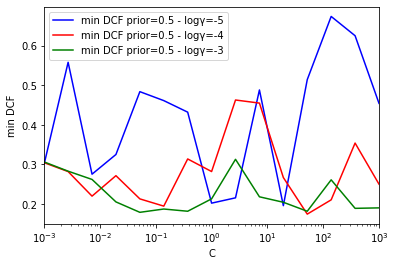

In [90]:
utils.plotDCFRBF(C, minDCF3fold, "C")

In [83]:
minDCF3fold7 = []
print("Start RBF SVM with 3-fold on z normalized features with PCA = 7")
for i in range(len(priors)):
    print("")
    print("Working on application with prior:", priors[i])
    for g in gamma:
        print("")
        print("Working with gamma:", g) 
        for value in C:
            temp = utils.KfoldSVM(PCA7, L, model, option='RBF',gamma=g, C=value, prior=priors[i])
            minDCF3fold7.append(temp)
            print("For C=", value, "the minDCF is", temp)
print("")
print("END")

Start RBF SVM with 3-fold on z normalized features with PCA = 7

Working on application with prior: 0.5

Working with gamma: 1e-05
For C= 0.001 the minDCF is 0.3025512755927232
For C= 0.0026826957952797246 the minDCF is 0.28495997579271276
For C= 0.0071968567300115215 the minDCF is 0.25143967401894907
For C= 0.019306977288832496 the minDCF is 0.360864965796239
For C= 0.0517947467923121 the minDCF is 0.19955792253037066
For C= 0.13894954943731375 the minDCF is 0.2860086777836089
For C= 0.3727593720314938 the minDCF is 0.4513652432214863
For C= 1.0 the minDCF is 0.20376640268323476
For C= 2.6826957952797246 the minDCF is 0.5587527778207642
For C= 7.196856730011514 the minDCF is 0.47142354684535265
For C= 19.306977288832496 the minDCF is 0.23409507460132423
For C= 51.794746792312125 the minDCF is 0.5551443715578198
For C= 138.9495494373136 the minDCF is 0.715583155682515
For C= 372.7593720314938 the minDCF is 0.5032779449407416
For C= 1000.0 the minDCF is 0.46886459379249557

Working with

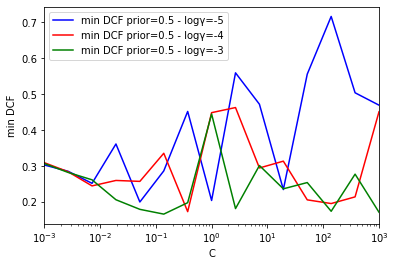

In [91]:
utils.plotDCFRBF(C, minDCF3fold7, "C")

In [4]:
minDCF3fold6 = []
print("Start RBF SVM with 3-fold on z normalized features with PCA = 6")
for i in range(len(priors)):
    print("")
    print("Working on application with prior:", priors[i])
    for g in gamma:
        print("")
        print("Working with gamma:", g) 
        for value in C:
            temp = utils.KfoldSVM(PCA6, L, model, option='RBF',gamma=g, C=value, prior=priors[i])
            minDCF3fold6.append(temp)
            print("For C=", value, "the minDCF is", temp)
print("")
print("END")

Start RBF SVM with 3-fold on z normalized features with PCA = 6

Working on application with prior: 0.5

Working with gamma: 1e-05
For C= 0.001 the minDCF is 0.3096295632997573
For C= 0.0026826957952797246 the minDCF is 0.3231375360641553
For C= 0.0071968567300115215 the minDCF is 0.29846704709408134
For C= 0.019306977288832496 the minDCF is 0.3798608952399296
For C= 0.0517947467923121 the minDCF is 0.18103991873611278
For C= 0.13894954943731375 the minDCF is 0.22205318121044548
For C= 0.3727593720314938 the minDCF is 0.19511686491591526
For C= 1.0 the minDCF is 0.2290841421084349
For C= 2.6826957952797246 the minDCF is 0.6804798848290834
For C= 7.196856730011514 the minDCF is 0.5168774162026261
For C= 19.306977288832496 the minDCF is 0.2269562386274805
For C= 51.794746792312125 the minDCF is 0.6961262781431123
For C= 138.9495494373136 the minDCF is 0.6883556668294809
For C= 372.7593720314938 the minDCF is 0.4661964134692399
For C= 1000.0 the minDCF is 0.46487141305982543

Working with

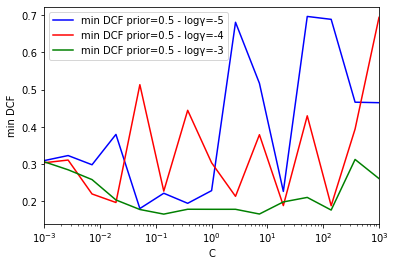

In [5]:
utils.plotDCFRBF(C, minDCF3fold6, "C")